In [146]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv


In [147]:
# Import libraries here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
#Read data file into dataframe and checking first 5 records

df=pd.read_csv("/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv")
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456


In [149]:
#checking a brief understanding about data types null values and no of records 
df.info()
#observation: 10000 records total, row number can be dropped customer id can be dropped and surname can be dropped as they will not 
#contribute to our prediction
columns_tobe_dropped=['RowNumber','CustomerId','Surname']
#other than that no missing values here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [150]:
#dropping non contributing columns here
df=df.drop(columns=columns_tobe_dropped)

In [151]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456


In [152]:
df.info()
#now we have 15 columns we will focus on object type columns what data they have and oultiers for numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

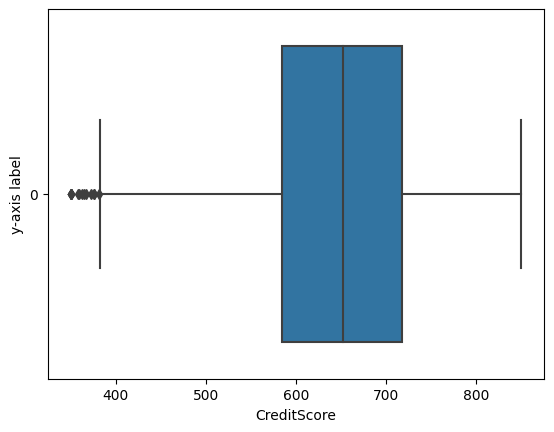

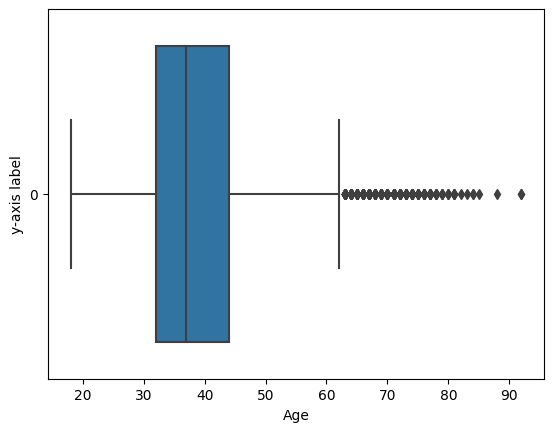

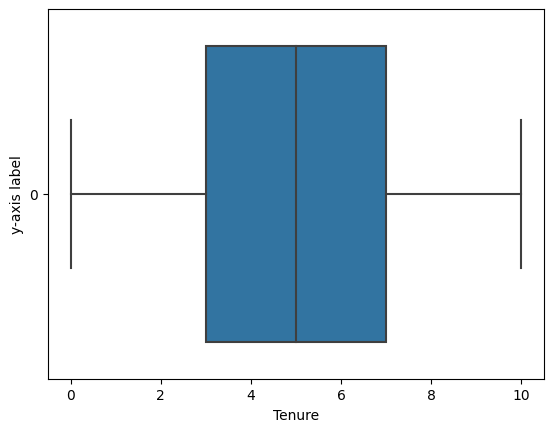

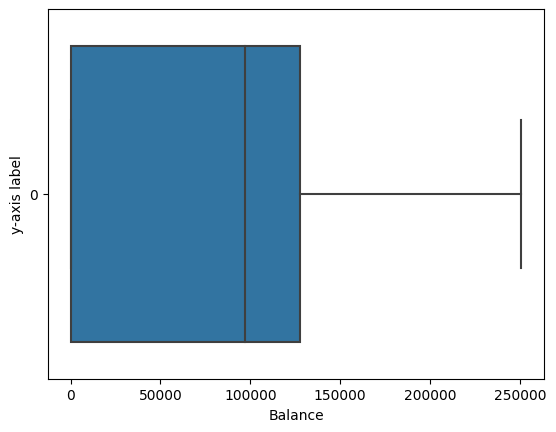

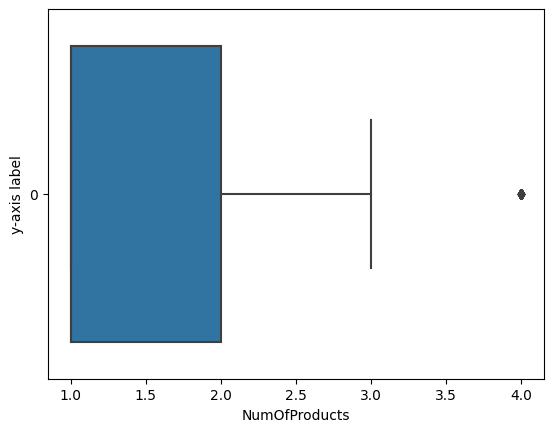

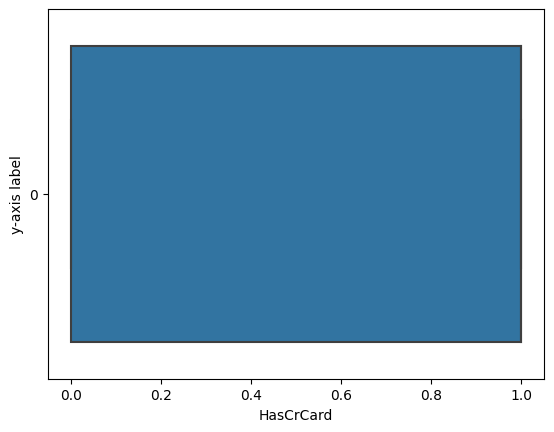

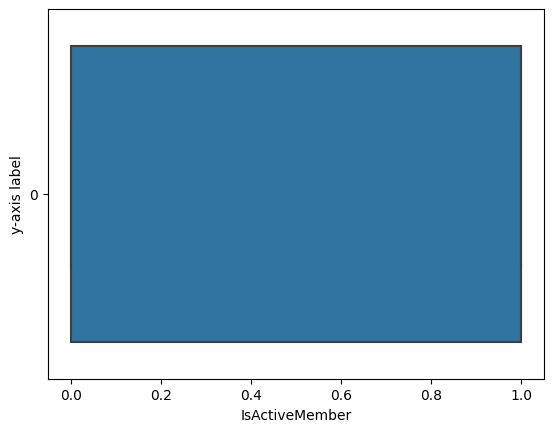

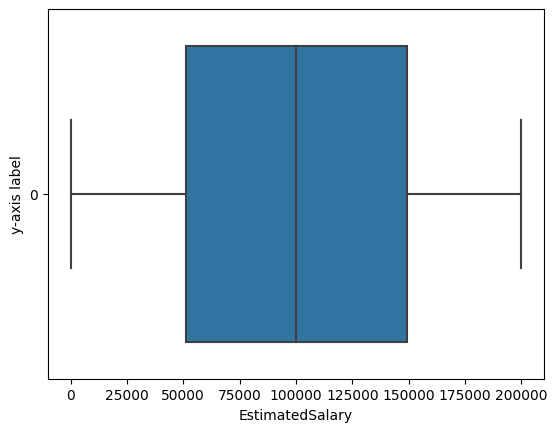

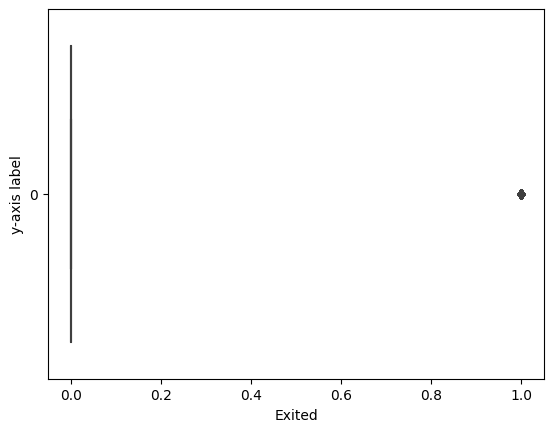

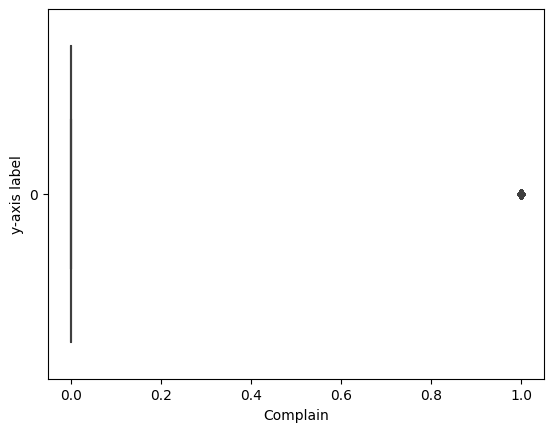

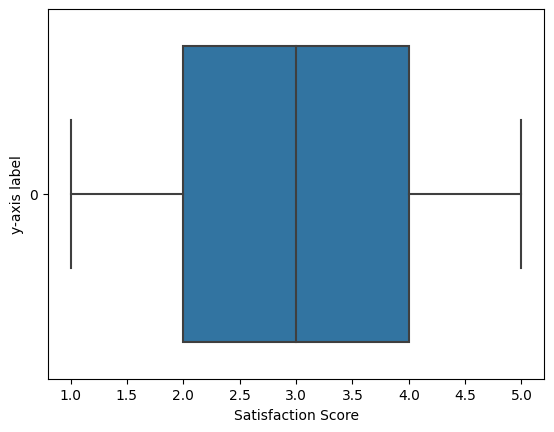

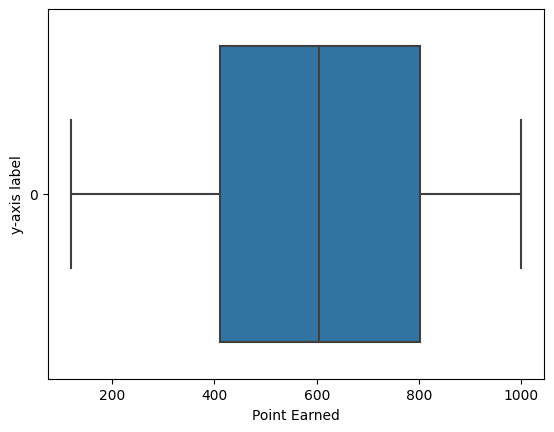

In [153]:
#check for outliers here in each column by visually we can check through boxplot
#here we have declared a function which can plot boxplot 
def boxplots(col):
    ax=sns.boxplot(df[col],orient='h')
    ax.set(xlabel=col, ylabel='y-axis label')
    plt.show()

for feature in df.select_dtypes(include=['number']).columns:
    boxplots(feature)
    
#Oservation 3 columns are showing oultiers we have to treat them and first find what are these outliers
columns_with_outliers=['CreditScore','Age','NumOfProducts']

In [154]:
columns_with_outliers

['CreditScore', 'Age', 'NumOfProducts']

In [155]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [156]:
#lets split our data into x and y first
# converting categorical data into numerical data
y = df['Exited']
x = df.copy()
x=x.drop(columns='Exited')

In [157]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [158]:
#doing encoding for Geography,Gender,Card Type
#check unique values first and then decide which encoding we can use

df['Geography'].value_counts() 
#3 geograpy france,germany and spain can go with label encoder as we will be using tree based algos
df['Gender'].value_counts() 
#male female label encoder them
df['Card Type'].value_counts()
#4 type label encode them as well for now
# order should be Silver>Gold>Diamond>Platinum

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

In [159]:
def cardTypeEncoder(value):
    if value =='SILVER':
        return 1
    elif value =='GOLD':
        return 2
    elif value =='DIAMOND':
        return 3
    else:
        return 4
x['Card Type'] = x['Card Type'].map(cardTypeEncoder)

In [160]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(feat):
    le = LabelEncoder()
    encoded_feat = le.fit_transform(feat)
    print(feat.name, le.classes_)
    return encoded_feat

In [161]:
x['Gender']=label_encoder(x['Gender'])

Gender ['Female' 'Male']


In [162]:
x['Geography']=label_encoder(x['Geography'])

Geography ['France' 'Germany' 'Spain']


In [164]:
x.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,2,3,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,1,3,3,456


In [165]:
# # Let's check the number of outliers per columns
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR
print(UL)
print()
print(LL)

CreditScore              919.00000
Geography                  2.50000
Gender                     2.50000
Age                       62.00000
Tenure                    13.00000
Balance               319110.60000
NumOfProducts              3.50000
HasCrCard                  2.50000
IsActiveMember             2.50000
EstimatedSalary       296967.45375
Complain                   0.00000
Satisfaction Score         7.00000
Card Type                  4.50000
Point Earned            1387.50000
dtype: float64

CreditScore              383.00000
Geography                 -1.50000
Gender                    -1.50000
Age                       14.00000
Tenure                    -3.00000
Balance              -191466.36000
NumOfProducts             -0.50000
HasCrCard                 -1.50000
IsActiveMember            -1.50000
EstimatedSalary       -96577.09625
Complain                   0.00000
Satisfaction Score        -1.00000
Card Type                  0.50000
Point Earned            -176.50000
dtyp

**here we will take each categorical column and check there frequency and unique values of them then we can encode them accordingly**

In [166]:
#number of outliers as per IQR range 

((x>UL) | (x < LL)).sum()

CreditScore             15
Geography                0
Gender                   0
Age                    359
Tenure                   0
Balance                  0
NumOfProducts           60
HasCrCard                0
IsActiveMember           0
EstimatedSalary          0
Complain              2044
Satisfaction Score       0
Card Type                0
Point Earned             0
dtype: int64

In [176]:
# As we can see here age and Credit score are the actual columns with outliers we will treat them
# as compalin and number of prducts are somehow categorical but here its int so showing oultiers
Q1 = x['CreditScore'].quantile(0.25)
Q3 = x['CreditScore'].quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR
print(UL)
print()
print(LL)


919.0

383.0


In [177]:
# Replace values greater than the upper threshold with NAN as we will impute the same with KNN
# Replace values lower than the lower threshold with NAN as we will impute the same with KNN

x['CreditScore'] = x['CreditScore'].where(x['CreditScore'] <= UL, np.nan)
x['CreditScore'] = x['CreditScore'].where(x['CreditScore'] >= LL, np.nan)


In [179]:
x['CreditScore'].isnull().sum()

15

In [174]:
Q1_AGE = x['Age'].quantile(0.25)
Q3_AGE = x['Age'].quantile(0.75)
IQR = Q3_AGE - Q1_AGE
UL_AGE = Q3_AGE + 1.5 * IQR
LL_AGE = Q1_AGE - 1.5 * IQR
print(UL_AGE)
print()
print(LL_AGE)


62.0

14.0


In [181]:
x['Age'] = x['Age'].where(x['Age'] <= UL_AGE, np.nan)
x['Age'] = x['Age'].where(x['Age'] >= LL_AGE, np.nan)


In [183]:
x['Age'].isnull().sum()

359

**Now we have first changed all outliers to NAN time to impute them by KNN imputer******

In [184]:
# Applying capping method by using KNN imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
x_impute = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)
x_impute

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619.0,0.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,2.0,3.0,464.0
1,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,1.0,3.0,3.0,456.0
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,3.0,3.0,377.0
3,699.0,0.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,5.0,2.0,350.0
4,850.0,2.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,5.0,2.0,425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,0.0,1.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0,1.0,3.0,300.0
9996,516.0,0.0,1.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0,5.0,4.0,771.0
9997,709.0,0.0,0.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0,3.0,1.0,564.0
9998,772.0,1.0,1.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0,2.0,2.0,339.0


In [188]:
x_impute.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [195]:
x_impute.isnull().sum().sum()

0

**Now we will be doing scaling of features iam using here standard scaler**

In [196]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x_impute), columns=x_impute.columns)

In [197]:
x_scaled.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,-0.332750,-0.901886,-1.095988,0.484873,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.972908,-0.721130,0.447446,-0.630839
1,-0.447320,1.515067,-1.095988,0.369594,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,1.972908,-0.009816,0.447446,-0.666251
2,-1.551359,-0.901886,-1.095988,0.484873,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.972908,-0.009816,0.447446,-1.015942
3,0.500487,-0.901886,-1.095988,0.139036,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.506866,1.412812,-0.447625,-1.135457
4,2.073222,1.515067,-1.095988,0.600152,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.506866,1.412812,-0.447625,-0.803472


**Good to go for TTS test train split**

In [199]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2, random_state=42,
                                                   stratify=y)

In [200]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [201]:
f_df = pd.DataFrame({"feature":x_train.columns, 
                     'rf_importance':rf.feature_importances_}).sort_values(by='rf_importance',
                                                                          ascending=False)

In [202]:
f_df

,feature,rf_importance
10,Complain,0.820611
3,Age,0.065838
6,NumOfProducts,0.043534
5,Balance,0.013221
13,Point Earned,0.009054
9,EstimatedSalary,0.009041
8,IsActiveMember,0.009023
0,CreditScore,0.008106
1,Geography,0.006044
4,Tenure,0.004884


In [203]:
pred_train_rf = rf.predict(x_train)
pred_test_rf = rf.predict(x_test)

In [204]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("***************Confusion Matrix*********************")
print(confusion_matrix(y_train, pred_train_rf))
print("*******************************")
print(confusion_matrix(y_test, pred_test_rf))

***************Confusion Matrix*********************
[[6370    0]
 [   0 1630]]
*******************************
[[1591    1]
 [   2  406]]


In [205]:
print("***************classification_report*********************")
print(classification_report(y_train, pred_train_rf))
print("*******************************")
print(classification_report(y_test, pred_test_rf))

***************classification_report*********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

*******************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [206]:
print("***************accuracy_score*********************")
print(accuracy_score(y_train, pred_train_rf))
print("*******************************")
print(accuracy_score(y_test, pred_test_rf))

***************accuracy_score*********************
1.0
*******************************
0.9985


**RandomForest Classifier with feature selection part - recursive feature technique**

In [212]:
from sklearn.feature_selection import RFE
rf1 = RandomForestClassifier()
feature_1 = RFE(estimator=rf1, n_features_to_select=5, step=1 )
feature_1 = feature_1.fit(x_train, y_train)

In [213]:
pred_train_rf1 = feature_1.predict(x_train)
pred_test_rf1 = feature_1.predict(x_test)

In [214]:
print("***************accuracy_score*********************")
print(accuracy_score(y_train, pred_train_rf1))
print("*******************************")
print(accuracy_score(y_test, pred_test_rf1))

***************accuracy_score*********************
0.999875
*******************************
0.9985


<!-- We will use KNN imputer here to impute the outliers as it gives more approx good results -->
<!--  -->